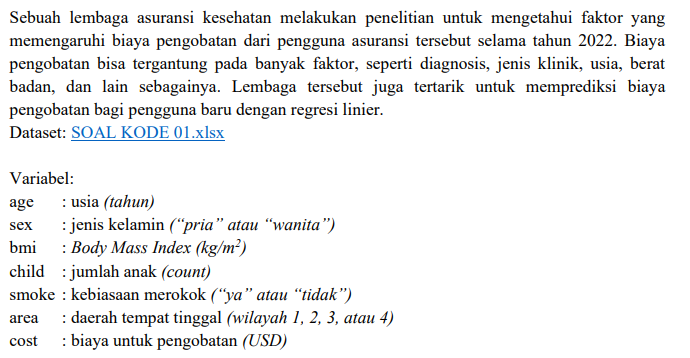

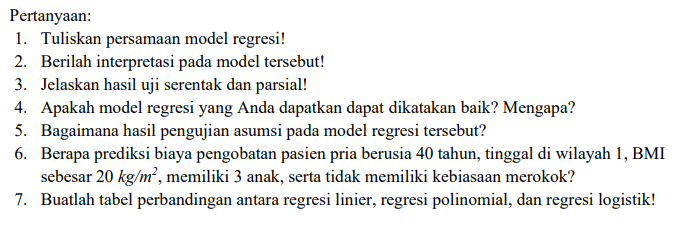

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.stats.diagnostic as smd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KodeSoal1.xlsx')

In [ ]:
df.head()

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,wanita,27.900,0,ya,wilayah 1,16884.92400
1,18,pria,33.770,1,tidak,wilayah 2,1725.55230
2,28,pria,33.000,3,tidak,wilayah 2,4449.46200
3,33,pria,22.705,0,tidak,wilayah 3,21984.47061
4,32,pria,28.880,0,tidak,wilayah 3,3866.85520


In [ ]:
df['merokok'] = df['merokok'].map({'ya': 1, 'tidak': 0})
df['jenis kelamin'] = df['jenis kelamin'].map({'wanita': 0, 'pria': 1})
df['wilayah'] = df['wilayah'].map({'wilayah 1': 1, 'wilayah 2': 2, 'wilayah 3':3, 'wilayah 4':4})

In [ ]:
df

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [ ]:
data= pd.read_csv('/content/KodeSoal1.csv')
data.head()

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,wanita,27.900,0,ya,wilayah 1,16884.92400
1,18,pria,33.770,1,tidak,wilayah 2,1725.55230
2,28,pria,33.000,3,tidak,wilayah 2,4449.46200
3,33,pria,22.705,0,tidak,wilayah 3,21984.47061
4,32,pria,28.880,0,tidak,wilayah 3,3866.85520


### Cek data type

In [ ]:
df_dtypes = pd.DataFrame({'Columns':df.columns})

lst_nilai = []
for i in df_dtypes['Columns']:
  lst_nilai.append(df[[i]].sample(1).values[[0]])

df_dtypes['Value'] = lst_nilai
df_dtypes['Data Types'] = df.dtypes.values

df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])
df_dtypes

,Columns,Value,Data Types
0,usia,[[33]],int64
1,jenis kelamin,[[1]],int64
2,imt,[[31.13]],float64
3,anak,[[0]],int64
4,merokok,[[0]],int64
5,wilayah,[[1]],int64
6,biaya,[[6455.86265]],float64


In [ ]:
lst_missval = []

for i in df.isnull().sum():
  lst_missval.append((i / len(df) * 100))

df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_missval

,Column Name,Missing Value Percentage (%),Data Types
0,usia,0.0,int64
1,jenis kelamin,0.0,int64
2,imt,0.0,float64
3,anak,0.0,int64
4,merokok,0.0,int64
5,wilayah,0.0,int64
6,biaya,0.0,float64


### Model Regresi

In [ ]:
x = df.drop(columns=['biaya'], axis=1)
y = df['biaya']

In [ ]:
import statsmodels.api as sm
from scipy import stats

#summary
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  biaya   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:50:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.323e+04   1076.023    -12.295

## Persamaan regresi

$\hat{Y} = -13230.012 + 257.288 X_1 + 332.570 X_3 + 479.369 X_4 + 23820.434 X_5 + 353.640 X_6$

Berdasarkan persamaan diatas, dapat diketahui bahwa koefisien $X_1$ , $X_3$, $X_4$, $X_5$, dan $X_6$ pada model regresi adalah positif, artinya terdapat hubungan yang positif pada usia, imt, jumlah anak, kebiaasaan merokok, dan wilyah terhadap banyak biaya asuransi.

semakin bertambah usia biaya semakin meningkat
semakin tinggi imt biaya semakin meningkat
semakin banyak anak, biaya semakin meningkat
jika memiliki kebiasaan merokok, biaya semakin meningkat
dan semakin besar jenis wilayah, biaya semakin meningkat

ketika seluruh variabel independen = 0, nilai biaya asuransi = -13230.012
ketika usia bertambah 1 satuan maka jumlah biaya meningkat sebanyak 257.288
ketika jumlah imt meningkat sebanyak 1 satuan, maka jumlah penjualan meningkat sebanyak 332.570
dan seterusnya

biaya akan meningkat sebanyak 479.369 satuan untuk setiap pertambahan jumlah anak (X4)dan variabel lainnya dianggap konstan.

biaya akan meningkat sebanyak 23820.434 satuan untuk orang yang memiliki kebiasaan merokok (X5)dan variabel lainnya dianggap konstan.



In [ ]:
print(f'y = {result.intercept_}') # ini kalau pakek model linear regression

In [ ]:
print(f"Persamaan regresi: Y = {result.params[0]} + {result.params[1]}X1 + {result.params[3]}X3 + {result.params[4]}X4 + {result.params[5]}X5 + {result.params[6]}X6")

Persamaan regresi: Y = -13230.012387464416 + 257.28807485798063X1 + 332.5701322423218X3 + 479.36939354463067X4 + 23820.43412267205X5 + 353.64001655977245X6


## R-Squarew
diketahui nilai r-square sebesar 75.1% artinya variabel independen pada model dapat menjelaskan variabel dependen dengan sangat baik. sedangan sisanya 34.9% dipengaruhi oleh faktor lain.

## Uji Serentak dan Parsial

In [ ]:
print('F-hitung = ', result.fvalue) #F hitung
print('P-value = ', result.f_pvalue) #P-value

F-hitung =  668.124317085049
P-value =  0.0


In [ ]:
alpha = 0.05

#Daerah penolakan dan keputusan
if result.f_pvalue > alpha:
	print('gagal tolak H0 artinya tidak ada variabel independen yang mempengaruhi variabel Y')
else:
	print('tolak h0 minimal ada satu variabel independen yang mempengaruhi variabel Y')

tolak h0 minimal ada satu variabel independen yang mempengaruhi variabel Y


In [ ]:
# PARSIAL
print('t-hitung = ', result.tvalues) #F hitung
print('P-value = ', result.pvalues) #P-value

t-hitung =  const           -12.295293
usia             21.646781
jenis kelamin    -0.393949
imt              11.996542
anak              3.482670
merokok          57.838645
wilayah           2.327703
dtype: float64
P-value =  const            5.491596e-33
usia             2.848607e-89
jenis kelamin    6.936815e-01
imt              1.471633e-31
anak             5.125266e-04
merokok          0.000000e+00
wilayah          2.007715e-02
dtype: float64


In [ ]:
 #Hasil ringkasan
summary = result.summary2().tables[1]

# Interpretasi hasil
significance_summary = {}
for var, row in summary.iterrows():
    p_value = row['P>|t|']
    if p_value < alpha:
        significance_summary[var] = 'signifikan'
    else:
        significance_summary[var] = 'tidak signifikan'

# Cetak hasil interpretasi
for var, significance in significance_summary.items():
    print(f"Variabel {var} {significance} dengan alpha {alpha}")

Variabel const signifikan dengan alpha 0.05
Variabel usia signifikan dengan alpha 0.05
Variabel jenis kelamin tidak signifikan dengan alpha 0.05
Variabel imt signifikan dengan alpha 0.05
Variabel anak signifikan dengan alpha 0.05
Variabel merokok signifikan dengan alpha 0.05
Variabel wilayah signifikan dengan alpha 0.05


## Uji Serentak

Uji F digunakan untuk melihat apakah model secara keseluruhan layak atau tidak. Juga sering disebut Goodness of Fit.

$H_{0}: \beta_{1} = \beta_{2} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2$

diperoleh hasil tolak h0 oleh karena itu terdapat minimal 1 variabel yang tidak sama dengan 0 atau mempengaruhi variabel dependen y

## Uji Parsial

untuk mencari variabel mana yang signifikan antara semua variabel x

Uji t adalah untuk menguji apakah satu variabel bebas mempunyai pengaruh yang signifikan terhadap variabel terikat atau tidak.

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

diperoleh hasil semua variabel x berpengaruh signifikan terhadap variabel y kecuali variabel x2 atau jenis kelamin karena pvaluenya > 0.05 yaitu 0.6

### Apakah model tersebut bisa dikatan baik?

dengan r-square 75,1% dikatakan 75,1% variansi biaya asuransi dapat dijelaskan oleh variabel independen jadi model tersebut dapat dikatakan sudah cukup baik. tetapi masih harus tetap memperhatikan faktor lain

## UJI ASUMSI

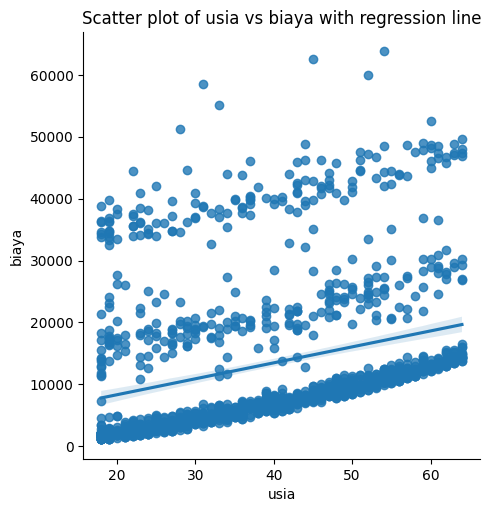

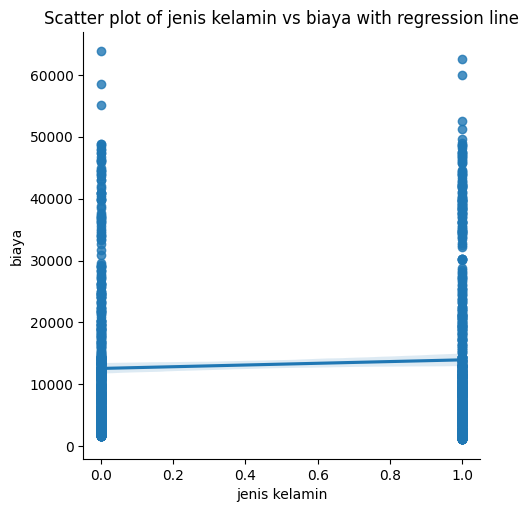

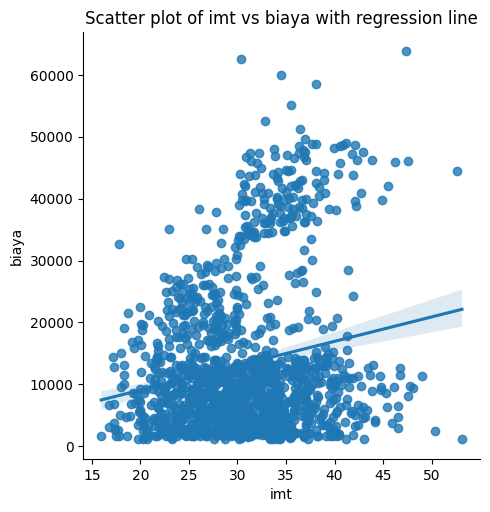

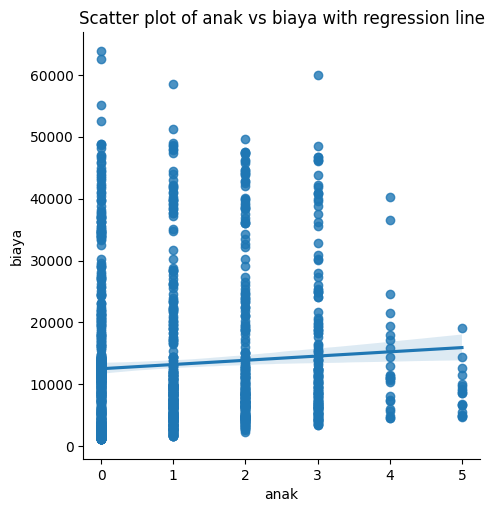

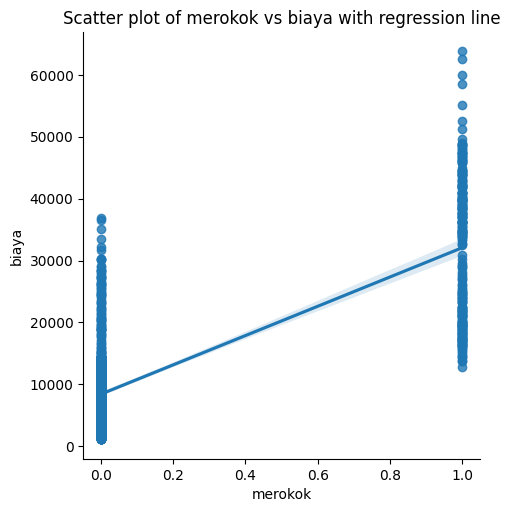

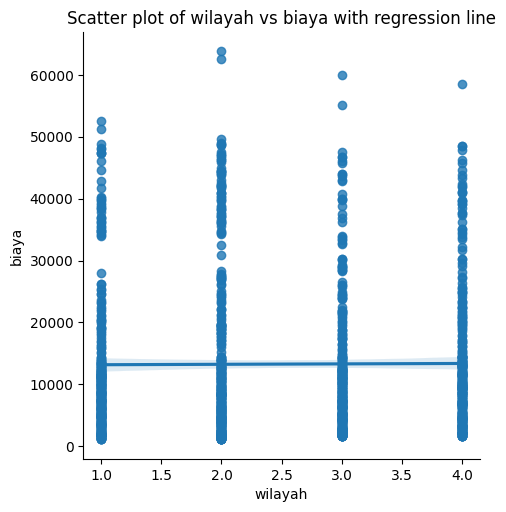

In [ ]:
# Uji Linearitas

for col in X.columns[1:]:
    sns.lmplot(x=col, y='biaya', data=df)
    plt.title(f'Scatter plot of {col} vs biaya with regression line')
    plt.show()

In [ ]:
def plot_assumption_linearitas(df, x_col, y_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from statsmodels.graphics.regressionplots import plot_partregress_grid

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='biaya', data=df)
    plt.title('Scatter Plot of {} vs {}'.format(x_col, y_col))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

    # Fit the regression model
    X = sm.add_constant(df[x_col])
    model = sm.OLS(df[y_col], X).fit()
    df['residuals'] = model.resid
    df['fitted'] = model.fittedvalues

    # Residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(x='fitted', y='residuals', data=df, lowess=True)
    plt.title('Residual Plot')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, linestyle='--', color='red')
    plt.show()

    # Partial regression plot
    fig = plt.figure(figsize=(12, 8))
    plot_partregress_grid(model, fig=fig)
    plt.show()

# Contoh penggunaan
plot_assumption_linearitas(df, x, y)


NameError: name 'col' is not defined

<Figure size 800x600 with 0 Axes>

TypeError: unhashable type: 'Series'

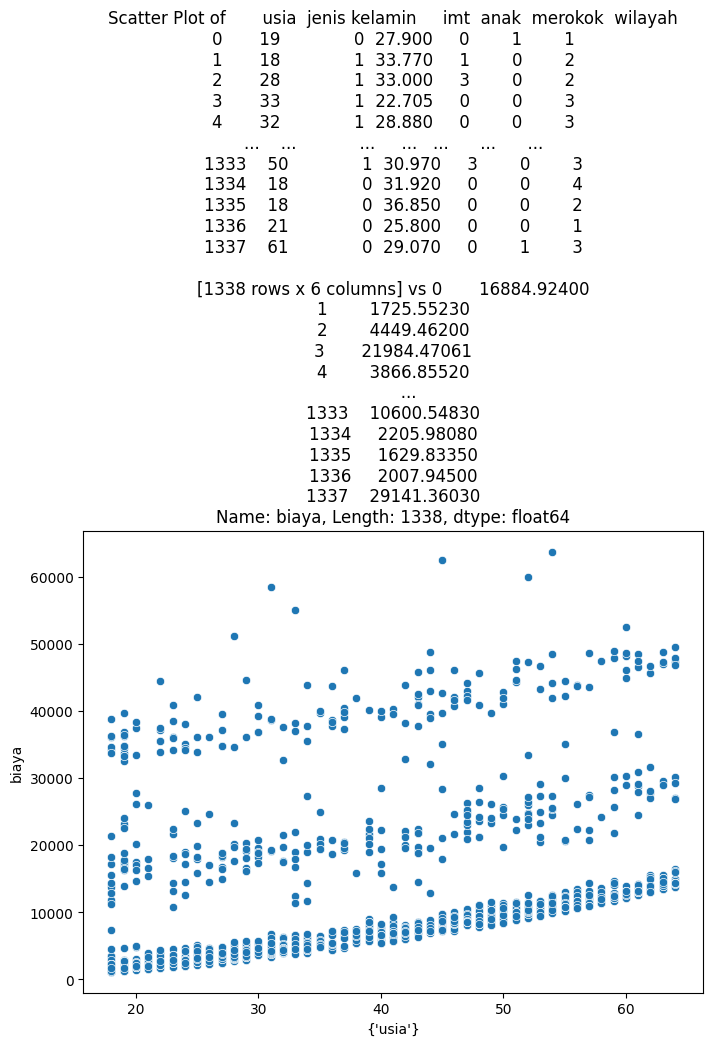

In [ ]:
plt.figure(figsize=(8, 6))
for col in X.columns[1:]:
  sns.scatterplot(x=col, y='biaya', data=df)
  plt.title('Scatter Plot of {} vs {}'.format(x, y))
  plt.xlabel({col})
  plt.ylabel({y})
  plt.show()

In [ ]:
#Autokorelasi (ini gausah dihafalin, ada di output ols)

dw_value = durbin_watson(result.resid)
print(f'Nilai Durbin-Watson: {dw_value:.4f}')

plot_acf(result.resid)
plt.title('Autocorrelation of Residuals')
plt.show()


NameError: name 'result' is not defined

hasil uji white (140.66161979774233, 4.343333944276951e-18, 6.165276190126426, 3.014767869374015e-19)


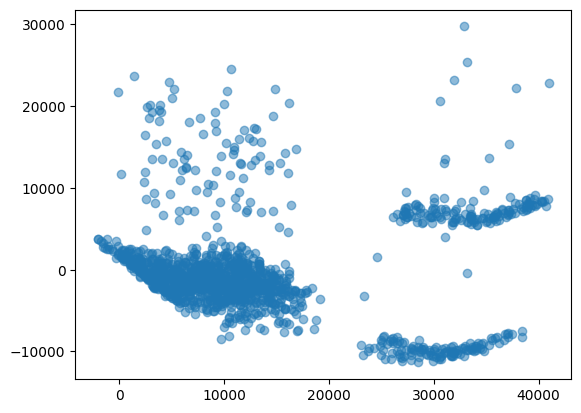

In [ ]:
# Uji Heterokesdasitas

# bisa make uji white (regresi antara absolut residual dengan var x)
# atau memakai plot antara fitted values dengan residuals
# homo kalau plotnya acak tidak membentuk pita/lonceng

from statsmodels.stats.diagnostic import het_white
uji_white = het_white(result.resid, X)
print("hasil uji white",uji_white)

residuals = result.resid
fitted_values = result.fittedvalues
plt.scatter(fitted_values, residuals, alpha=0.5)


In [ ]:
# Melakukan Uji White
# Hasil dari model.fittedvalues adalah nilai prediksi dari model
# smd.het_white membutuhkan residual dan design matrix sebagai input
white_test = smd.het_white(result.resid, result.model.exog)

# Output hasil uji White
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, white_test))

print(results)

# H0 = tidak ada heteroskeidesitas
# H1 = terdpat heteroskedesitas
# hasil gagal tolak H0, karena pvalue > alpha maka tidak ada heteroskedasitas


{'Test Statistic': 140.66161979774233, 'Test Statistic p-value': 4.343333944276951e-18, 'F-Statistic': 6.165276190126426, 'F-Test p-value': 3.014767869374015e-19}


In [ ]:
#uji homoskedastisiti uji glejser
glejser = sm.OLS(abs(residual), X_dummy).fit()

#df_glejser = pd.DataFrame(glejser.pvalues, columns = ['p-value'])
#df_glejser

df_glejser = pd.DataFrame(glejser.pvalues, columns = ['p-value'])
df_glejser['Keputusan'] = df_glejser['p-value'].gt(0.05)
df_glejser['Keputusan'] = df_glejser['Keputusan'].replace({True:'Gagal Tolak H0',
                                                           False:'Tolak H0'})
df_glejser

In [ ]:
# Uji Distribusi Error Normal

from scipy.stats import shapiro
stat, p_value = shapiro(result.resid)

print(f'Statistik Shapiro-Wilk: {stat}')
print(f'p-value: {p_value}')

Statistik Shapiro-Wilk: 0.8990615606307983
p-value: 8.660521172067415e-29


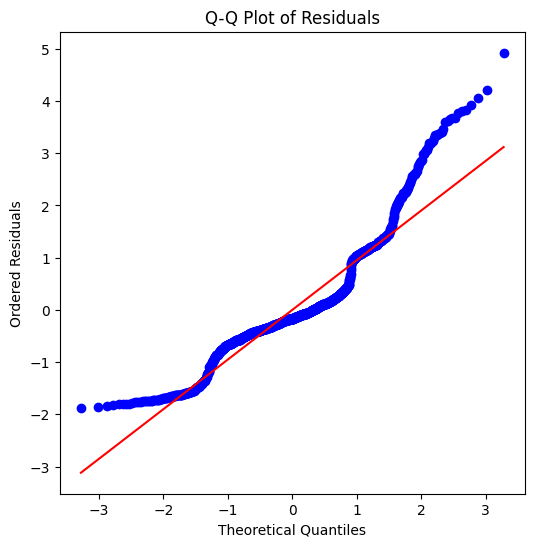

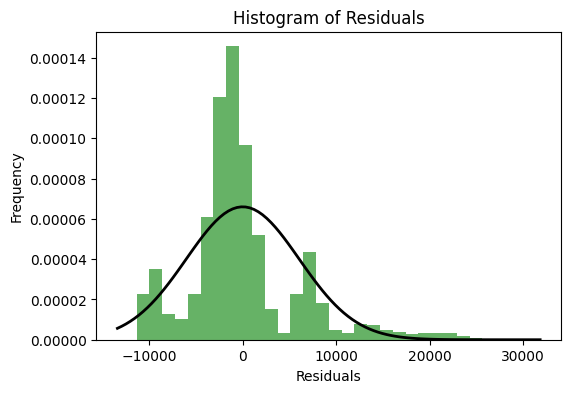

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_residual_normality(residuals):
    # Hitung z-scores untuk setiap residual
    z_scores = (residuals - np.mean(residuals)) / np.std(residuals)

    # Buat plot Q-Q untuk mengecek normalitas
    fig, ax = plt.subplots(figsize=(6, 6))
    stats.probplot(z_scores, dist="norm", plot=ax)
    ax.set_title('Q-Q Plot of Residuals')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Ordered Residuals')
    plt.show()

    # Buat histogram residual
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Buat kurva kepadatan kernel
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()

# Contoh penggunaan:
# asumsikan 'residuals' adalah array atau list yang berisi residual dari model statistik Anda
# Misalnya: residuals = np.random.normal(0, 1, 100) # Contoh data residual acak
plot_residual_normality(result.resid)


## Polinomial


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.7445422986536563


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print('r square polinom =', r2_score(y_test, y_pred))

r square polinom = 0.8534532500457798


In [ ]:
# UJI NORMALITAS
from scipy.stats import shapiro

# Mengambil sampel data yang ingin diuji normalitasnya
residuals = result.resid

# Menjalankan uji Shapiro-Wilk
statistic, p_value = shapiro(residuals)

# Menampilkan hasil uji
print("Statistik Uji Shapiro-Wilk:", statistic)
print("P-Value:", p_value)

# Menentukan apakah data berdistribusi secara normal
alpha = 0.05  # Tingkat signifikansi yang ditentukan
if p_value > alpha:
    print("Data berdistribusi secara normal")
else:
    print("Data tidak berdistribusi secara normal")


Statistik Uji Shapiro-Wilk: 0.8990615606307983
P-Value: 8.660521172067415e-29
Data tidak berdistribusi secara normal


In [ ]:
# Uji Multikolinearitas

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature        VIF
0          const  42.188974
1           usia   1.015394
2  jenis kelamin   1.008889
3            imt   1.040608
4           anak   1.002482
5        merokok   1.006466
6        wilayah   1.025966


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['biaya'], axis=1)
y = df['biaya']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

vif_data

,feature,VIF
0,usia,7.899420
1,jenis kelamin,2.010015
2,imt,10.338039
3,anak,1.803661
4,merokok,1.259029
5,wilayah,4.842637


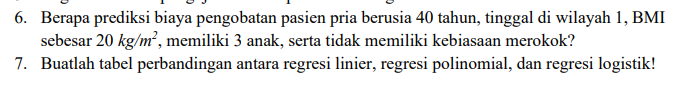

In [ ]:
def prediksi2(data):
    for umur, wilayah, bmi, anak, rokok in zip(df['usia'], df['wilayah'], df['imt'], df['anak'],df['merokok']):
        hasil = result.params[0] + result.params[1]*umur + result.params[3]*bmi + result.params[4]*anak + result.params[5]*rokok + result.params[6]*wilayah
        print(f"prediksi biaya pengobatan kakek adalah {hasil:.0f}")

# Memanggil fungsi dengan data prediksi
prediksi2({
   'usia'=40,
   'wilayah'=1,
   'imt'=20,
   'anak'=[3],
   'rokok'=[0]
})


SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (<ipython-input-61-dc5999f51340>, line 8)

In [ ]:
hasil = result.params[0] + result.params[1]*40 + result.params[3]*20 + result.params[4]*3 + result.params[5]*1 + result.params[6]*1
print(f'prediksi biaya pengobatan kakek adalah {hasil}')

prediksi biaya pengobatan kakek adalah 29325.09557156696


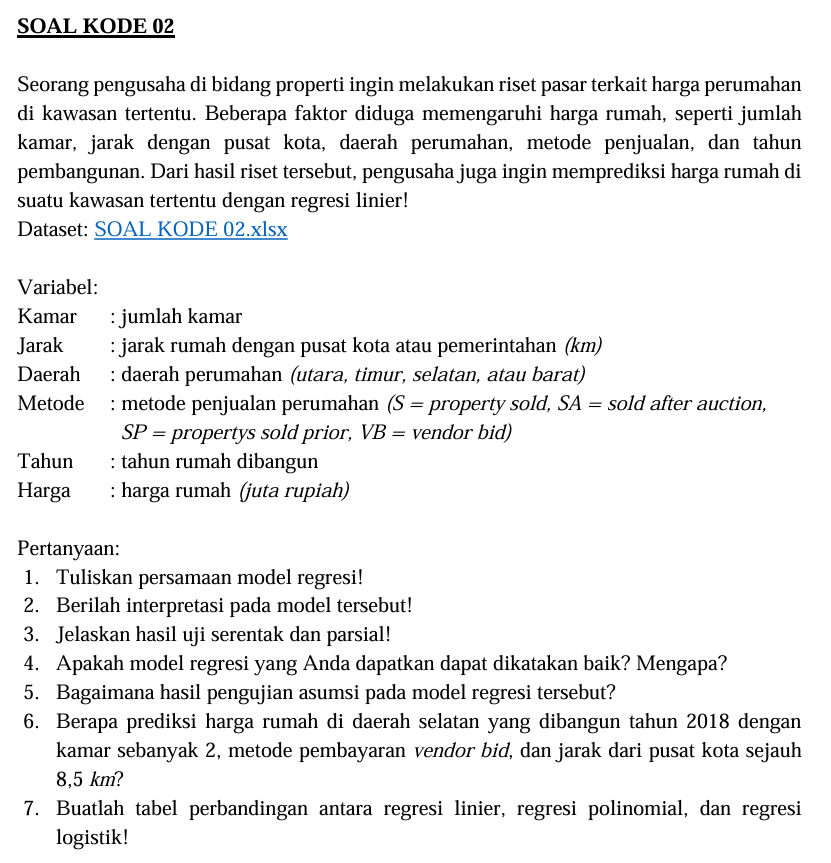

In [ ]:
df3= pd.read_excel('/content/KodeSoal1.xlsx', sheet_name=1)
df3

,Kamar,Jarak,Daerah,Metode,Tahun,Harga
0,3,3.0,Utara,S,2018,1490.0
1,3,3.0,Utara,S,2009,1220.0
2,3,3.0,Utara,S,2010,1420.0
3,2,10.4,Barat,S,2011,670.0
4,2,10.4,Barat,S,2008,530.0
...,...,...,...,...,...,...
35309,3,23.2,Timur,SP,1995,736.0
35310,3,8.4,Utara,S,1995,808.0
35311,3,20.6,Utara,S,2005,566.0
35312,3,20.6,Utara,S,2018,500.0


In [ ]:
df3 = pd.get_dummies(df3, columns=['Daerah','Metode'],drop_first=True)
df3.replace({True:1,False:0},inplace=True)
df3.head()


,Kamar,Jarak,Tahun,Harga,Daerah_Selatan,Daerah_Timur,Daerah_Utara,Metode_SA,Metode_SP,Metode_VB
0,3,3.0,2018,1490.0,0,0,1,0,0,0
1,3,3.0,2009,1220.0,0,0,1,0,0,0
2,3,3.0,2010,1420.0,0,0,1,0,0,0
3,2,10.4,2011,670.0,0,0,0,0,0,0
4,2,10.4,2008,530.0,0,0,0,0,0,0


In [ ]:
lst_missval = []

for i in df3.isnull().sum():
  lst_missval.append((i / len(df3) * 100))

df_missval = pd.DataFrame({'Column Name':df3.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df3.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_missval

,Column Name,Missing Value Percentage (%),Data Types
0,Kamar,0.0,int64
1,Jarak,0.0,float64
2,Tahun,0.0,int64
3,Harga,0.0,float64
4,Daerah_Selatan,0.0,int64
5,Daerah_Timur,0.0,int64
6,Daerah_Utara,0.0,int64
7,Metode_SA,0.0,int64
8,Metode_SP,0.0,int64
9,Metode_VB,0.0,int64


In [ ]:
x=df3.drop("Harga",axis=1)
y=df3["Harga"]


In [ ]:
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3706.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:35:28   Log-Likelihood:            -2.6419e+05
No. Observations:               35314   AIC:                         5.284e+05
Df Residuals:                   35304   BIC:                         5.285e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -540.7516    528.656     -1.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# Memilih kolom yang relevan
X = df3.drop(columns=['Harga'])  # Fitur
y = df3['Harga']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Train the linear regression model
modelreg = LinearRegression()
modelreg.fit(X_train, y_train)
# Menampilkan koefisien regresi dan intercept
print(f'Koefisien: {modelreg.coef_}')
print(f'Intercept: {modelreg.intercept_}')


# Evaluate model performance
y_pred_train = modelreg.predict(X_train)
y_pred_test = modelreg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"R-squared (train): {r2_train:.2f}")
print(f"R-squared (test): {r2_test:.2f}")
print(f"Mean Absolute Error (train): {mae_train:.2f}")
print(f"Mean Absolute Error (test): {mae_test:.2f}")

Koefisien: [ 3.78924254e+02 -4.11071611e+01  5.54093742e-01  5.54940338e+02
  3.38646846e+02  8.75587413e+01 -5.63818692e+01 -4.62509292e+01
  5.08392565e+00]
Intercept: -1019.5270769714926
R-squared (train): 0.48
R-squared (test): 0.50
Mean Absolute Error (train): 288.41
Mean Absolute Error (test): 286.30


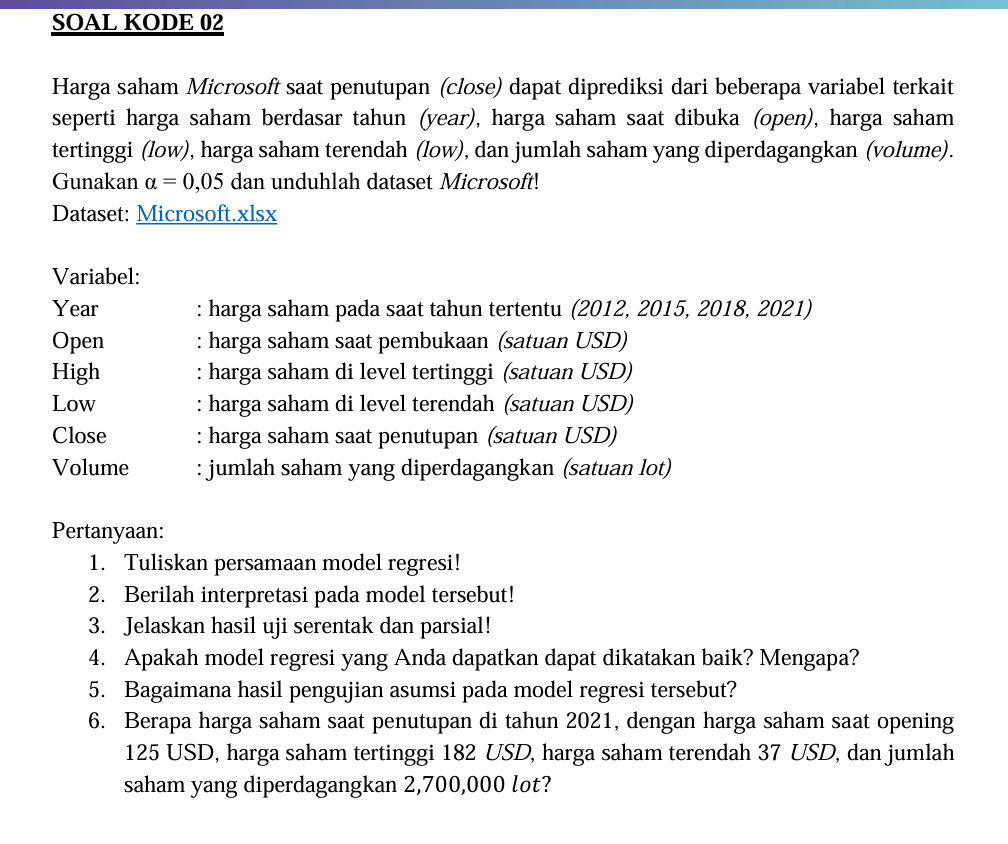

In [ ]:
data4=pd.read_excel("/content/KodeSoal2.xlsx")
data4

,Year,Open,High,Low,Close,Volume
0,2012,30.62,31.10,30.59,30.95,38414184
1,2012,30.85,31.10,30.64,30.96,49758864
2,2012,30.88,31.08,30.52,30.77,58182332
3,2012,30.63,30.70,30.19,30.45,50564284
4,2012,30.28,30.88,30.24,30.66,51201288
...,...,...,...,...,...,...
3125,2021,275.20,277.69,270.04,272.42,25076046
3126,2021,264.45,274.65,261.60,274.58,43797176
3127,2021,270.31,273.45,268.41,270.02,28058958
3128,2021,272.09,274.16,267.26,268.75,20210064


In [ ]:
print(data4.dtypes)

Year        int64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [ ]:
x=data4.drop("Volume",axis=1)
y=data4["Volume"]

In [ ]:
X=sm.add_constant(x)
models=sm.OLS(y,X).fit()
print(models.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     347.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.19e-297
Time:                        16:35:16   Log-Likelihood:                -56629.
No. Observations:                3130   AIC:                         1.133e+05
Df Residuals:                    3124   BIC:                         1.133e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.108e+09   3.16e+08     25.682      0.0

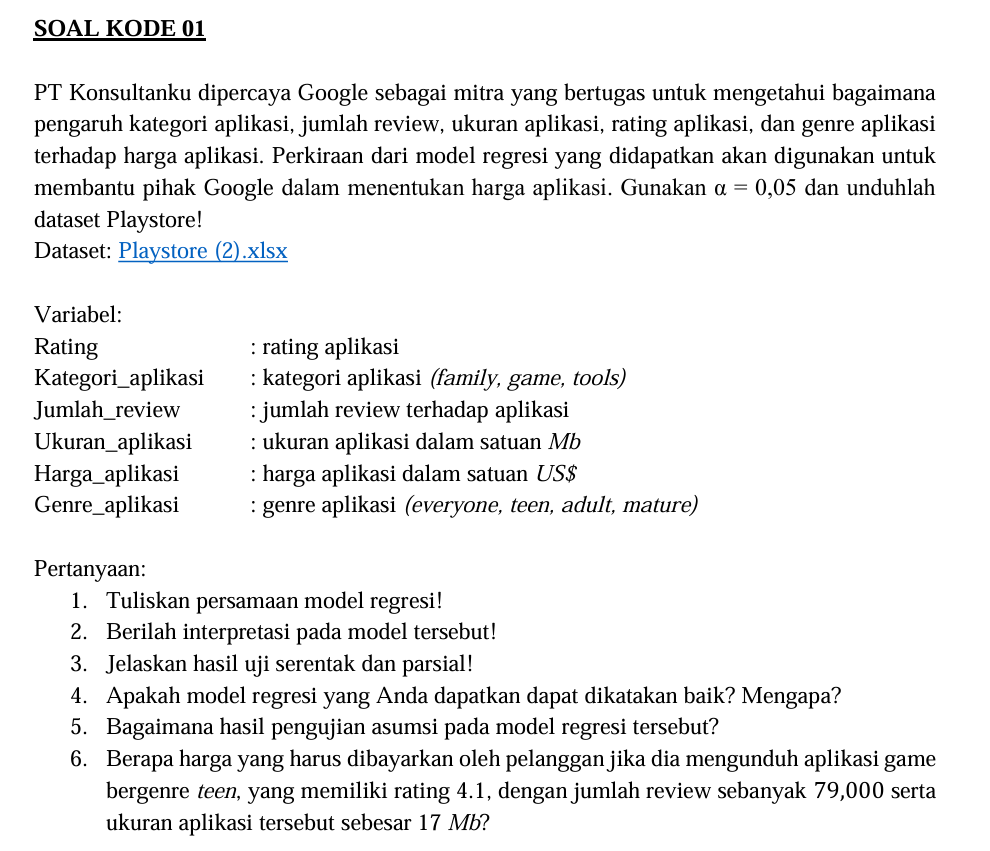

In [ ]:
data3 = pd.read_excel('/content/KodeSoal2.xlsx', sheet_name=1)
data3

,Rating,Kategori_aplikasi,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Genre_aplikasi
0,4.5,GAME,4447388,67.0,0.0,Adult
1,4.5,GAME,27722264,76.0,0.0,Adult
2,4.4,GAME,22426677,74.0,0.0,Everyone
3,4.7,GAME,254258,23.0,0.0,Everyone
4,4.5,GAME,148897,46.0,0.0,Everyone
...,...,...,...,...,...,...
3219,5.0,FAMILY,22,8.6,0.0,Teen
3220,4.2,FAMILY,117,13.0,0.0,Everyone
3221,4.0,FAMILY,7,2.6,0.0,Everyone
3222,4.5,FAMILY,38,53.0,0.0,Everyone


In [ ]:
data3.columns

Index(['Rating', 'Kategori_aplikasi', 'Jumlah_review', 'Ukuran_aplikasi (Mb)',
       'Harga_aplikasi ($)', 'Genre_aplikasi'],
      dtype='object')

In [ ]:
data3=pd.get_dummies(data3,columns=["Kategori_aplikasi","Genre_aplikasi"],drop_first=True)
data3.replace({True:1,False:0},inplace=True)
data3


,Rating,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Kategori_aplikasi_GAME,Kategori_aplikasi_TOOLS,Genre_aplikasi_Everyone,Genre_aplikasi_Mature,Genre_aplikasi_Teen
0,4.5,4447388,67.0,0.0,1,0,0,0,0
1,4.5,27722264,76.0,0.0,1,0,0,0,0
2,4.4,22426677,74.0,0.0,1,0,1,0,0
3,4.7,254258,23.0,0.0,1,0,1,0,0
4,4.5,148897,46.0,0.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
3219,5.0,22,8.6,0.0,0,0,0,0,1
3220,4.2,117,13.0,0.0,0,0,1,0,0
3221,4.0,7,2.6,0.0,0,0,1,0,0
3222,4.5,38,53.0,0.0,0,0,1,0,0


In [ ]:
data3.dtypes


Rating                     float64
Jumlah_review                int64
Ukuran_aplikasi (Mb)       float64
Harga_aplikasi ($)         float64
Kategori_aplikasi_GAME       int64
Kategori_aplikasi_TOOLS      int64
Genre_aplikasi_Everyone      int64
Genre_aplikasi_Mature        int64
Genre_aplikasi_Teen          int64
dtype: object

In [ ]:
x=data3.drop("Rating",axis=1)
y=data3["Rating"]

In [ ]:
X=sm.add_constant(x)
reg=sm.OLS(y,X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     17.44
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.13e-25
Time:                        17:08:03   Log-Likelihood:                -2354.9
No. Observations:                3224   AIC:                             4728.
Df Residuals:                    3215   BIC:                             4783.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
df2 = pd.read_excel('/content/KodeSoal2.xlsx', sheet_name=1)
df2

,Rating,Kategori_aplikasi,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Genre_aplikasi
0,4.5,GAME,4447388,67.0,0.0,Adult
1,4.5,GAME,27722264,76.0,0.0,Adult
2,4.4,GAME,22426677,74.0,0.0,Everyone
3,4.7,GAME,254258,23.0,0.0,Everyone
4,4.5,GAME,148897,46.0,0.0,Everyone
...,...,...,...,...,...,...
3219,5.0,FAMILY,22,8.6,0.0,Teen
3220,4.2,FAMILY,117,13.0,0.0,Everyone
3221,4.0,FAMILY,7,2.6,0.0,Everyone
3222,4.5,FAMILY,38,53.0,0.0,Everyone


In [ ]:
df2['Kategori_aplikasi'] = df['Kategori_aplikasi'].map({'GAME': 1, 'FAMILY': 2, 'TOOLS':0})
df2['Genre_aplikasi'] = df['Genre_aplikasi'].map({'Adult': 0, 'Everyone': 1, 'Teen':2, 'Mature':3})


In [ ]:
df2

,Rating,Kategori_aplikasi,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Genre_aplikasi
0,4.5,1,4447388,67.0,0.0,0
1,4.5,1,27722264,76.0,0.0,0
2,4.4,1,22426677,74.0,0.0,1
3,4.7,1,254258,23.0,0.0,1
4,4.5,1,148897,46.0,0.0,1
...,...,...,...,...,...,...
3219,5.0,2,22,8.6,0.0,2
3220,4.2,2,117,13.0,0.0,1
3221,4.0,2,7,2.6,0.0,1
3222,4.5,2,38,53.0,0.0,1


In [ ]:
lst_missval = []

for i in df2.isnull().sum():
  lst_missval.append((i / len(df2) * 100))

df_missval = pd.DataFrame({'Column Name':df2.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df2.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_missval

,Column Name,Missing Value Percentage (%),Data Types
0,Rating,0.0,float64
1,Kategori_aplikasi,0.0,int64
2,Jumlah_review,0.0,int64
3,Ukuran_aplikasi (Mb),0.0,float64
4,Harga_aplikasi ($),0.0,float64
5,Genre_aplikasi,0.0,int64


In [ ]:
x=df2.drop("Rating",axis=1)
y=df2["Rating"]

In [ ]:
X=sm.add_constant(x)
reg=sm.OLS(y,X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     21.67
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.12e-21
Time:                        17:18:21   Log-Likelihood:                -2370.0
No. Observations:                3224   AIC:                             4752.
Df Residuals:                    3218   BIC:                             4789.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0377 